In [42]:
# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, text, inspect, func

# ORM imports - for classes
from sqlalchemy import Column, Integer, String, Float, Boolean
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base

# data science
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sc

In [43]:
# Import Campaign CSV
df_campaign = pd.read_csv("Resources/campaign.csv")
# Import Category CSV
df_category = pd.read_csv("Resources/category.csv")
# Import Sub-Category CSV
df_subcategory = pd.read_csv("Resources/subcategory.csv")
# Import Contacts CSV
df_contacts = pd.read_csv("Resources/contacts.csv")

In [44]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('project_2.sqlite')

# Write the DataFrame to the SQLite database
df_campaign.to_sql('campaign', conn, if_exists='replace', index=False)
df_category.to_sql('category', conn, if_exists='replace', index=False)
df_subcategory.to_sql('sub_category', conn, if_exists='replace', index=False)
df_contacts.to_sql('contacts', conn, if_exists='replace', index=False)

# Commit and close the connection
conn.commit()
conn.close()

print("Database created successfully!")

Database created successfully!


In [55]:
filepath = "project_2.sqlite"
engine = create_engine(f"sqlite:///{filepath}")

In [46]:
# INSPECT

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

campaign
-----------
cf_id INTEGER
contact_id INTEGER
company_name TEXT
description TEXT
goal REAL
pledged REAL
outcome TEXT
backers_count INTEGER
country TEXT
currency TEXT
launch_date TEXT
end_date TEXT
category_ids TEXT
sub_category_ids TEXT

category
-----------
category_ids TEXT
category TEXT

contacts
-----------
contact_id INTEGER
first_name TEXT
last_name TEXT
email TEXT

sub_category
-----------
sub_category_ids TEXT
sub_category TEXT



In [19]:
# FAILED ORM ATTEMPT

# engine = create_engine('sqlite:///project_2.sqlite')
# Base = automap_base()
# Base.prepare(engine, reflect=True)
# campaign = Base.classes.campaign
# # Category = Base.classes.category
# # SubCategory = Base.classes.sub_category
# # Contacts = Base.classes.contacts

In [20]:
# FAILED ORM ATTEMPT

# session = Session(engine)

In [21]:
# # FAILED ORM ATTEMPT

# result = session.query(func.count(func.distinct(campaign.company_name)).label('company_count'), campaign.outcome) \
#                 .filter(campaign.outcome.in_(['failed', 'successful', 'live', 'canceled'])) \
#                 .group_by(campaign.outcome) \
#                 .all()

# # Print the results
# for row in result:
#     print(row.company_count, row.outcome)

In [70]:
query = """SELECT c.category, COUNT(DISTINCT company_name) AS company_count, outcome
FROM campaign ca
JOIN category c ON ca.category_ids = c.category_ids
WHERE outcome IN ('failed', 'successful', 'live', 'canceled')
GROUP BY c.category, outcome;"""

cat_outcome = pd.read_sql(text(query), con=engine)
cat_outcome.set_index('category', inplace=True)
cat_outcome.head()

,company_count,outcome
category,,
film & video,11,canceled
film & video,59,failed
film & video,5,live
film & video,102,successful
food,4,canceled


In [48]:
query = """SELECT c.category, sc.sub_category, COUNT(DISTINCT company_name) AS company_count, outcome
FROM campaign ca
JOIN category c ON ca.category_ids = c.category_ids
JOIN sub_category sc ON ca.sub_category_ids = sc.sub_category_ids
WHERE outcome IN ('failed', 'successful', 'live', 'canceled')
GROUP BY c.category, sc.sub_category, outcome;"""

cat_outcome = pd.read_sql(text(query), con=engine)
cat_outcome.set_index('category', inplace=True)
cat_outcome.head()

,sub_category,company_count,outcome
category,,,
film & video,animation,1,canceled
film & video,animation,10,failed
film & video,animation,2,live
film & video,animation,21,successful
film & video,documentary,4,canceled


In [49]:
query = """SELECT c.category, AVG(backers_count) AS avg_backers_per_category
FROM campaign ca
JOIN category c ON ca.category_ids = c.category_ids
GROUP BY c.category;"""

cat_back = pd.read_sql(text(query), con=engine)
cat_back.set_index('category', inplace=True)
cat_back.head()

,avg_backers_per_category
category,
film & video,684.691011
food,627.086957
games,784.625000
journalism,298.500000
music,737.154286


In [50]:
query = """SELECT sc.sub_category, AVG(backers_count) AS avg_backers_per_subcategory
FROM campaign ca
JOIN sub_category sc ON ca.sub_category_ids = sc.sub_category_ids
GROUP BY sc.sub_category;"""

sub_cat_back = pd.read_sql(text(query), con=engine)
sub_cat_back.set_index('sub_category', inplace=True)
sub_cat_back.head()

,avg_backers_per_subcategory
sub_category,
animation,857.588235
audio,298.500000
documentary,714.950000
drama,438.243243
electric music,850.166667


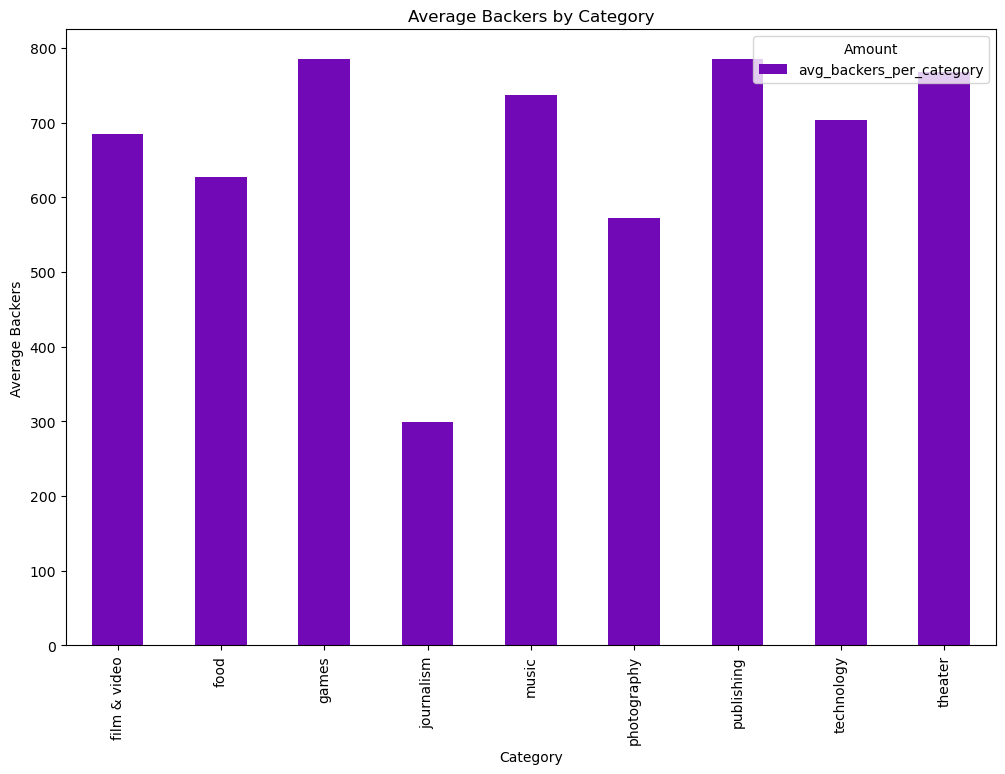

In [51]:
# Plot Category vs Avg(Backers)
colors = ['#7209b7']
cat_back.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average Backers by Category')
plt.xlabel('Category')
plt.ylabel('Average Backers')
plt.legend(title='Amount', loc='upper right')
plt.show()

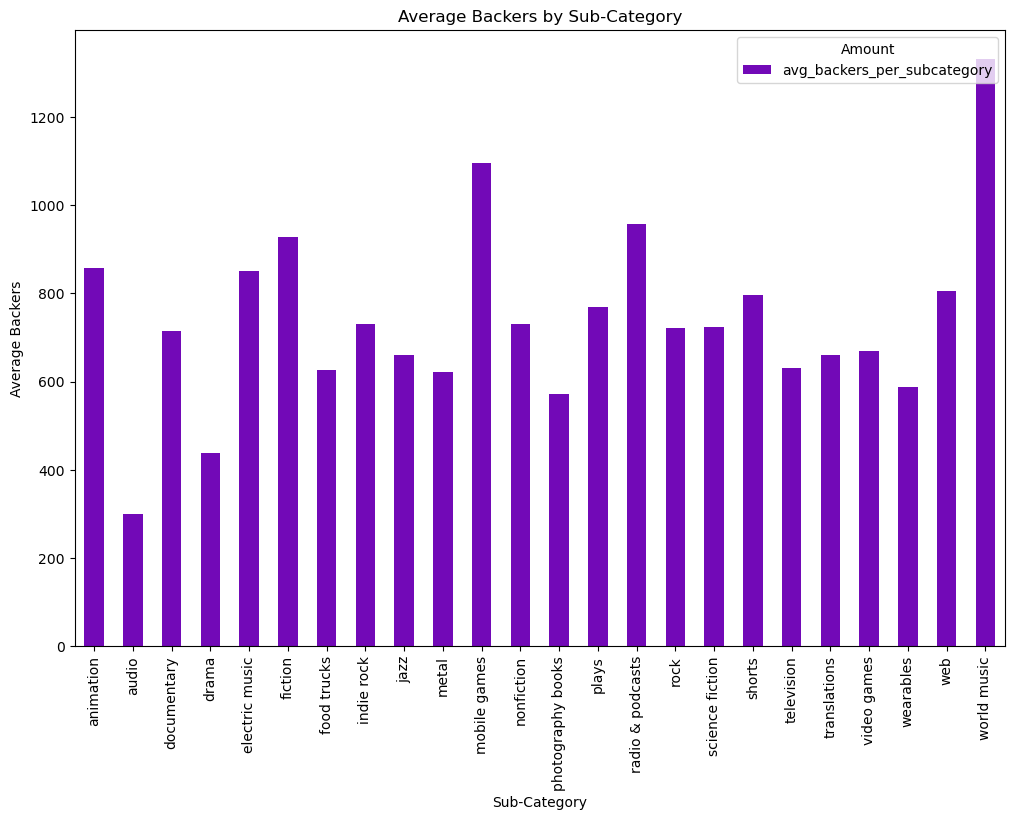

In [52]:
# Plot Sub-Category vs Avg(Backers)
colors = ['#7209b7']
sub_cat_back.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average Backers by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Backers')
plt.legend(title='Amount', loc='upper right')
plt.show()